In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from pyvista import examples
import torch

l:\program\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
result2 = np.load('./transport_TS60_result_posvel.npy')
result1 = np.load('./transport_TS60_result_collisionPos.npy')

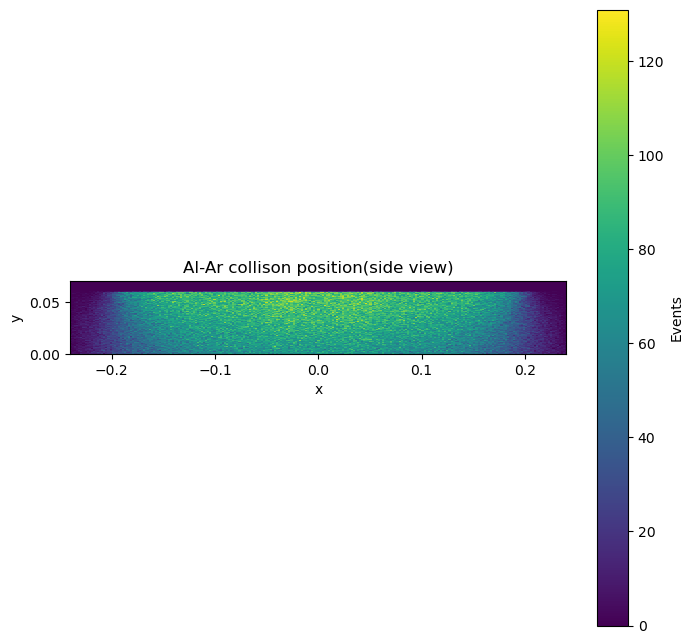

In [3]:
x_erosion_np = result1[:,0]
z_erosion_np = result1[:,2]

xbins = np.linspace(-0.24,0.24,240)
zbins = np.linspace(0,0.07,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Al-Ar collison position(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [6]:
result1.shape

(2536430, 3)

In [7]:
x_erosion_np = result1[:,0]
y_erosion_np = result1[:,1]
z_erosion_np = result1[:,2]

xbins = np.linspace(-0.24,0.24,240)
ybins = np.linspace(-0.24,0.24,240)
zbins = np.linspace(0,0.07,200)

H, edges = np.histogramdd(result1, bins=(xbins,ybins, zbins))

In [8]:
H.shape

(239, 239, 199)

In [21]:
np.array([result1[1]]).shape

(1, 3)

In [34]:
H2, edges2 = np.histogramdd(np.array([result1[1020230]]), bins=(xbins,ybins, zbins))

In [35]:
indice = np.where(H2 == True)
print(indice)
print(H[indice])

(array([137], dtype=int64), array([82], dtype=int64), array([116], dtype=int64))
[3.]


In [44]:
xbins = np.linspace(-0.24,0.24,241)
ybins = np.linspace(-0.24,0.24,241)
zbins = np.linspace(0,0.07,201)

In [78]:
# import numpy as np
# ylarge = np.where(result1[:, 1] > 0)
# resulty = result1[ylarge]
resulty = result1
# 假设 result1, xbins, ybins, zbins 已经定义
x_erosion_np = resulty[:, 0]
y_erosion_np = resulty[:, 1]
z_erosion_np = resulty[:, 2]

xbins = np.linspace(-0.24, 0.24, 120)
ybins = np.linspace(-0.24, 0.24, 120)
zbins = np.linspace(0, 0.07, 50)

# 创建三维直方图
H, edges = np.histogramdd(resulty, bins=(xbins, ybins, zbins))

# 找到每个点的 bin 索引
x_indices = np.digitize(x_erosion_np, xbins) - 1
y_indices = np.digitize(y_erosion_np, ybins) - 1
z_indices = np.digitize(z_erosion_np, zbins) - 1

# 确保索引在有效范围内
valid = (
    (x_indices >= 0) & (x_indices < len(xbins) - 1) &
    (y_indices >= 0) & (y_indices < len(ybins) - 1) &
    (z_indices >= 0) & (z_indices < len(zbins) - 1)
)

x_indices = x_indices[valid]
y_indices = y_indices[valid]
z_indices = z_indices[valid]

# 获取每个点的缩放值
scalars = H[x_indices, y_indices, z_indices]

# 如果需要将 scalars 转换回列表格式
print(scalars.shape)


(2522868,)


In [86]:
(4.614+4.151)/2

4.3825

In [79]:
point_cloud = resulty[valid]
print(point_cloud.shape)

(2522868, 3)


In [85]:
pl = pv.Plotter(off_screen=True)
pl.add_mesh(
    point_cloud,
    style='points_gaussian',
    color='#fff7c2',
    scalars=scalars,
    opacity=1.0,
    point_size=0.3,
    show_scalar_bar=False,
)
pl.background_color = 'k'
pl.add_bounding_box()
pl.show(auto_close=False)

Widget(value='<iframe src="http://localhost:59758/index.html?ui=P_0x2424d93f650_20&reconnect=auto" class="pyvi…

In [12]:
scalars.shape

(32314,)

In [13]:
cloud

PointSet,Information
N Cells,0
N Points,32314
X Bounds,"7.451e+01, 7.892e+01"
Y Bounds,"1.616e+01, 2.275e+01"
Z Bounds,"8.900e+01, 9.319e+01"
N Arrays,0
